In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud


data = pd.read_csv('spam.csv',encoding='latin-1')
data = data.drop(data.columns[2:], axis=1)

X = data['v2'].values
y = data['value']= data['v1'].map({'ham':0, 'spam':1})

X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.4)
data

,v1,v2,value
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [2]:
vectorizer = TfidfVectorizer(decode_error='ignore')
Xtr = vectorizer.fit_transform(X_train)
Xte = vectorizer.transform(X_test)

In [3]:
model = MultinomialNB()
model.fit(Xtr, y_train)
model.score(Xte,y_test)

0.9519964109466128

In [4]:
model = MultinomialNB()
model.fit(Xtr, y_train)
model.score(Xte,y_test)

0.9519964109466128

### We got the same results from both Countvector and TfidfVector

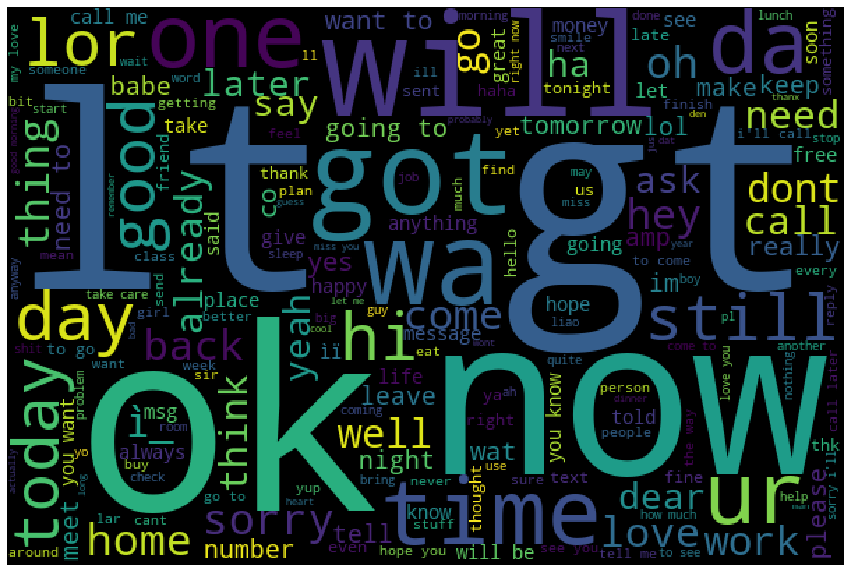

In [5]:
def visualize(label, data):
  words = ''
  for msg in data[data['v1'] == label]['v2']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.figure(figsize=(15,15))
  plt.imshow(wordcloud)
  plt.axis('off')

visualize('ham', data)

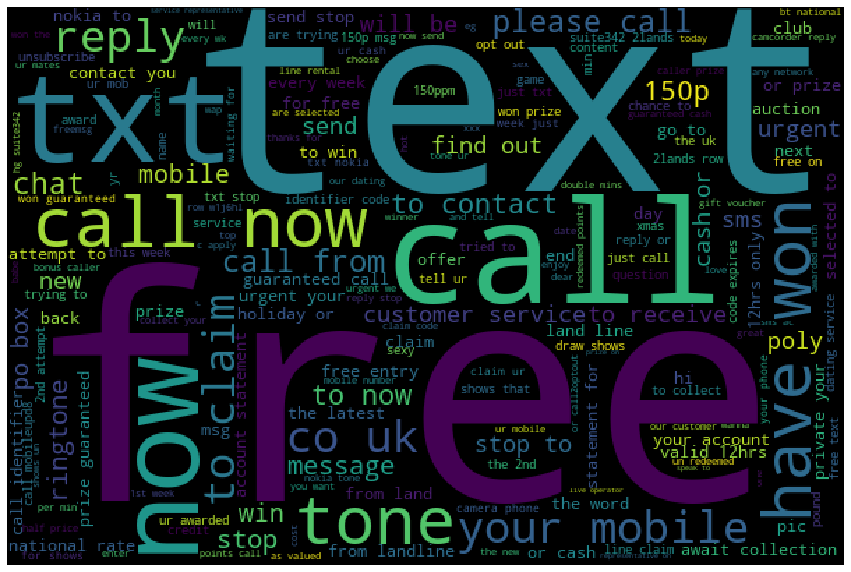

In [6]:
visualize('spam', data)

### Lets see where we went wrong with our predictions

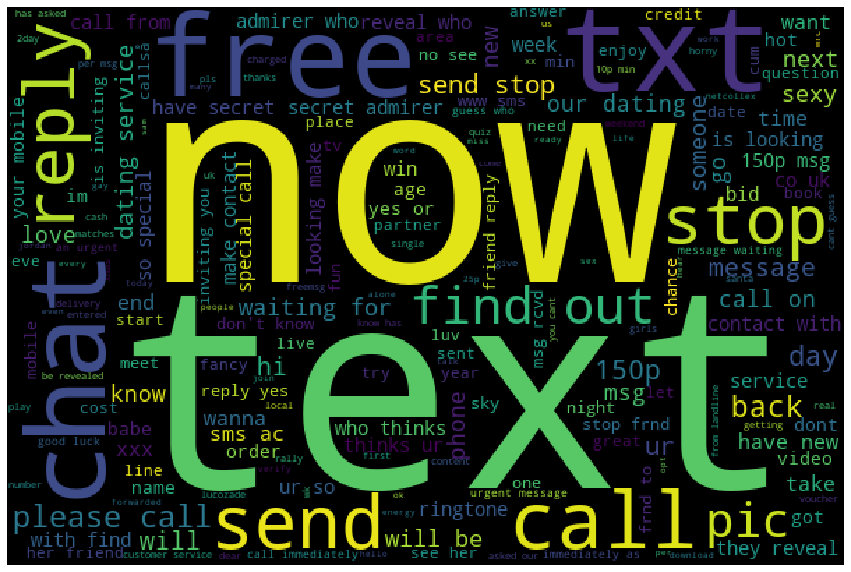

In [7]:
X = vectorizer.transform(X)
data['predict'] = model.predict(X)
test = data[data.value != data.predict]
visualize('spam', test)